In [120]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np

In [121]:
# read data from csv
file= './rawData/p15_ass1_HMD_rotation.csv'
rawData = pd.read_csv(file, sep=",")
rawData.head(5)

,Var1,Var2,Var3,g,o
0,A1,0,320,a,1
1,A1,1,84,a,1
2,A1,2,73,a,1
3,A1,3,71,a,1
4,A1,4,71,a,1


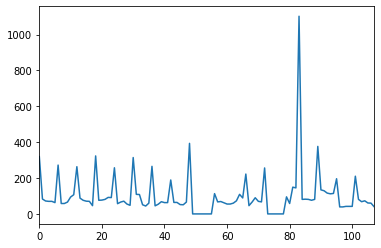

In [122]:
rawData['Var3'].plot()

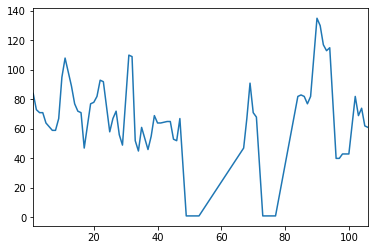

In [123]:
# filter fixed rotation range [1,5]
data_fixedRotation = rawData[(rawData.Var2 >=1) & (rawData.Var2 <=5 ) ]
data_fixedRotation.Var3.plot()

,Var1,Var2,Var3,g,o
1,A1,1,84,a,1
2,A1,2,73,a,1
3,A1,3,71,a,1
4,A1,4,71,a,1
5,A1,5,64,a,1


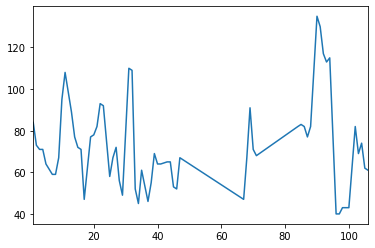

In [124]:
# filter remove outliner 
#rotationTime = data_fixedRotation.Var3
data_removeOutliber = data_fixedRotation[(data_fixedRotation.Var3!=1)& (data_fixedRotation.Var3<1000)]
data_removeOutliber.Var3.plot()
data_removeOutliber.head()

In [125]:
valveIndex = data_removeOutliber.Var1
pureIndex = valveIndex.drop_duplicates()
pureIndex.head()
length = pureIndex.shape[0]
print(length)

13


In [126]:
# classfy the frame according to valve index
processedData = pd.Series([])
for k in pureIndex:
    #print(k)
    #index = k.to_string()
    curRotation = data_removeOutliber[data_removeOutliber.Var1 == k]
    curMean = curRotation.Var3.mean()
    #print(curMean)
    curPersentage = curRotation.Var3/curMean
    # print(curPersentage)
    processedData= pd.concat([processedData,curPersentage],axis = 0)
processedData.head(10)
print(processedData)

1      1.157025
2      1.005510
3      0.977961
4      0.977961
5      0.881543
         ...   
102    1.178161
103    0.991379
104    1.063218
105    0.890805
106    0.876437
Length: 65, dtype: float64


In [127]:
e = stats.entropy(processedData)
print(e)

4.160184189453517


In [128]:
# normalize
df_norm = (processedData - processedData.mean()) / (processedData.max() - processedData.min())
e = stats.entropy(processedData)
print(e)

4.160184189453517


In [129]:
pA = processedData/processedData.sum()
shannonE = -np.sum(pA*np.log2(pA))
print(shannonE)

6.001877099309261
